In [111]:
#most python scripts start with 'import' statements like this that make
#useful packages available. Examples are 'uproot' which reads in our data
#files and allows them to be read, 'numpy' is a powefule and popular package
#for fast manipultation of arrays and 'scip.stats' is useful for statitical
#analysis, we'll use it to generate and fit fucntions to our data.
import lorentz
import uproot
import uproot_methods.classes.TLorentzVector as LVepm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import cauchy
from scipy.stats import expon
from scipy.stats import norm

from scipy.stats import crystalball
import pandas as pd

In [13]:
#the first thing we want to do is read our data file. The file is hosted on a CERN web-server so you
#will see a full web address. As this file is large and we are reading over the web,
#this step can take a few minutes
#%timeit eventsData = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/Data/data_D.2lep.root")["mini"]

%time
eventsData = uproot.open("data_D.2lep.root")["mini"]

print("File has been successfully opened!")
eventsData.show()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
File has been successfully opened!
runNumber                  (no streamer)              asdtype('>i4')
eventNumber                (no streamer)              asdtype('>i4')
channelNumber              (no streamer)              asdtype('>i4')
mcWeight                   (no streamer)              asdtype('>f4')
scaleFactor_PILEUP         (no streamer)              asdtype('>f4')
scaleFactor_ELE            (no streamer)              asdtype('>f4')
scaleFactor_MUON           (no streamer)              asdtype('>f4')
scaleFactor_PHOTON         (no streamer)              asdtype('>f4')
scaleFactor_TAU            (no streamer)              asdtype('>f4')
scaleFactor_BTAG           (no streamer)              asdtype('>f4')
scaleFactor_LepTRIGGER     (no streamer)              asdtype('>f4')
scaleFactor_PhotonTRIGGER  (no streamer)              asdtype('>f4')
trigE                      (no streamer)              asdtype('bool')
tri

In [14]:
#the file is now represented by the variable "eventsData".
#we can have a peek inside the file to see what kind of information is available
#by running the following command

eventsData.show()

runNumber                  (no streamer)              asdtype('>i4')
eventNumber                (no streamer)              asdtype('>i4')
channelNumber              (no streamer)              asdtype('>i4')
mcWeight                   (no streamer)              asdtype('>f4')
scaleFactor_PILEUP         (no streamer)              asdtype('>f4')
scaleFactor_ELE            (no streamer)              asdtype('>f4')
scaleFactor_MUON           (no streamer)              asdtype('>f4')
scaleFactor_PHOTON         (no streamer)              asdtype('>f4')
scaleFactor_TAU            (no streamer)              asdtype('>f4')
scaleFactor_BTAG           (no streamer)              asdtype('>f4')
scaleFactor_LepTRIGGER     (no streamer)              asdtype('>f4')
scaleFactor_PhotonTRIGGER  (no streamer)              asdtype('>f4')
trigE                      (no streamer)              asdtype('bool')
trigM                      (no streamer)              asdtype('bool')
trigP                      (no s

In [63]:
nEvents = 200000 
#this is the total number of collisions/events we want to access from the file, you can reduce this
#for quick test, for final results 100000 events should be enough

lep_E, lep_pt, lep_phi, lep_eta, lep_type_Data, lep_isTightID, lep_ptcone30 = eventsData.arrays(["lep_E", "lep_pt", "lep_phi", "lep_eta", "lep_type", "lep_isTightID", "lep_ptcone30"], outputtype=tuple, entrystop=nEvents)
flatData = LVepm.TLorentzVectorArray.from_ptetaphi(lep_pt, lep_eta, lep_phi, lep_E)

successfully analysed 56372 events


(array([8008., 7921., 6860., 7460., 6747., 7744., 7425., 8208., 7607.,
        7966., 6942., 7533., 6993., 7580., 7683.]),
 array([-3.14      , -2.72133333, -2.30266667, -1.884     , -1.46533333,
        -1.04666667, -0.628     , -0.20933333,  0.20933333,  0.628     ,
         1.04666667,  1.46533333,  1.884     ,  2.30266667,  2.72133333,
         3.14      ]),
 <a list of 15 Patch objects>)

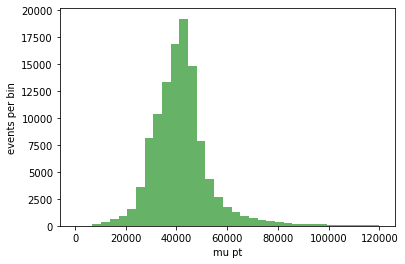

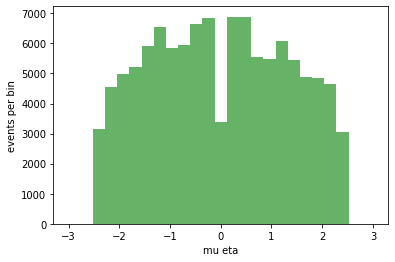

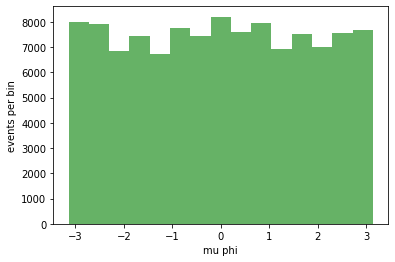

In [128]:
#create a few arrays to hold some specific information about the collisions
massesData = np.array([])
muPtData = np.array([])
muEtaData = np.array([])
muPhiData = np.array([])

nData = 0
nTarget = 200000

minMass = 85000
maxMass = 96000
    
#loop over events and extract info from the array
for ev in range(0,len(flatData)):
    if ((lep_type_Data[ev][0] == 13)&(lep_type_Data[ev][1]==13)&(lep_isTightID[ev][0] == True)&(lep_isTightID[ev][1]==True)):
        if ( (lep_ptcone30[ev][0]/lep_pt[ev][0] < 0.1) & (lep_ptcone30[ev][1]/lep_pt[ev][1] < 0.1 )):
            mumu = flatData[ev][0] + flatData[ev][1] 
            mass = mumu.mass
            if (( mass > minMass) & (mass < maxMass)):
                massesData = np.append(massesData,mass)
                muPtData = np.append(muPtData,flatData[ev][0].pt)
                muPtData = np.append(muPtData,flatData[ev][1].pt)
                muEtaData = np.append(muEtaData,flatData[ev][0].eta)
                muEtaData = np.append(muEtaData,flatData[ev][1].eta)
                muPhiData = np.append(muPhiData,flatData[ev][0].phi)
                muPhiData = np.append(muPhiData,flatData[ev][1].phi)
                nData = nData + 1
            if (nData == nTarget):
                break
        
print("successfully analysed " +str(nData) + " events")

# plot the mu pt histogram.
plt.figure()
plt.xlabel("mu pt")
plt.ylabel("events per bin")
plt.hist(muPtData, bins=35, range=[0,120000], alpha=0.6, color='g')

# plot the mu pseudorapdity histogram.
plt.figure()
plt.xlabel("mu eta")
plt.ylabel("events per bin")
plt.hist(muEtaData, bins=25, range=[-3.0,3.0], alpha=0.6, color='g')

# plot the mu phi histogram.
plt.figure()
plt.xlabel("mu phi")
plt.ylabel("events per bin")
plt.hist(muPhiData, bins=15, range=[-3.14,3.14], alpha=0.6, color='g')

12401840.0
mu90758.73274311982
std1543.2719657626458


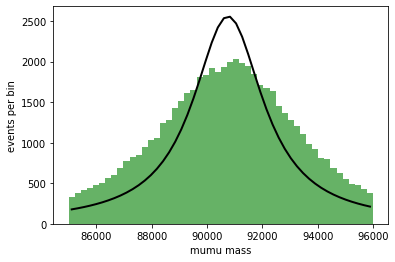

In [137]:
nBins =50 

mZ  = 91000.0
sigmaZ = 2100

#redefine m(mumu) as a numpy histogram
countsData, edges = np.histogram(massesData, bins=nBins, range=(minMass, maxMass))
centres = (edges[1:] + edges[:-1]) / 2

# get the width of each bin
bin_width = edges[1] - edges[0]
# sum over number in each bin and mult by bin width, which can be factored out
integral = bin_width * sum(countsData[0:nBins])

print(integral)

#fit a Cauchy distributions to the dimuon mass histogram
#massesData = massesData[ (massesData >= 60000) & (massesData <= 120000) ]
mu, std = cauchy.fit(massesData)
#beta, m, loc, scale = crystalball.fit(massesData)
#mu, std = norm.fit(massesData)

print("mu" + str(mu))
print("std" + str(std))

plt.figure()
p = (cauchy.pdf(centres, mu, std) * integral)
#p = (crystalball.pdf(centres, beta=beta, m=m, loc=loc, scale=scale) * integral)
#p = (crystalball.pdf(x, beta, m, scale=scale, loc=loc) * integral)

#p = (norm.pdf(centres, mu, std) * integral)

plt.plot(centres, p, 'k', linewidth=2)
plt.hist(massesData, bins=nBins, range=[minMass, maxMass], alpha=0.6, color='g')
plt.xlabel("mumu mass")
plt.ylabel("events per bin")
plt.show()


In [80]:
#chi-squared function
def calcChiSq(obs, preds):
    chiSq = 0.0
    ndf = len(obs)
    for bin in range(0, len(obs)):
        diff = preds[bin] - obs[bin]
        #print("diff = " + str(diff))
        var = ( np.abs(preds[bin])) 
        if (var != 0):
            chiSq += (diff**2)/(var)
            #print("obs, pred, diff, var  chi contrib = "+  str( obs[bin]) +" " +  str(preds[bin]) +" "+  str(diff) +" "+  str(var) +" " + str((diff**2)/(var)))
    return chiSq, ndf

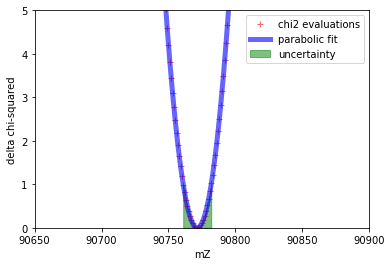

best-fit = 90771 +/- 10.022632033549598


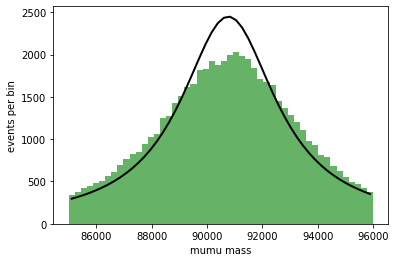

In [94]:
mZAr = np.array([])
chi2Ar = np.array([])

minMz = 90650
maxMz = 90900
step = 1

bestFitMz1D = 0.0
minChi2 = 10000000

fig, ax = plt.subplots()

for mZ in range(minMz, maxMz, step):
    countsPDF = (cauchy.pdf(centres, mZ, sigmaZ) * integral)
    chi2, ndf = calcChiSq(countsData, countsPDF)
    mZAr = np.append(mZAr, mZ)
    chi2Ar = np.append(chi2Ar, chi2)
    if(chi2 < minChi2):
        minChi2 = chi2
        bestFitMz1D = mZ

chi2Ar = chi2Ar - np.min(chi2Ar)
    
ax.plot(mZAr, chi2Ar, 'r+', lw=5, alpha=0.6, label="chi2 evaluations")

z = np.polyfit(mZAr, chi2Ar, 2)
p = np.poly1d(z)

ax.plot(mZAr, p(mZAr), 'b-', lw=5, alpha=0.6, label="parabolic fit")

# 'statitical uncertianty' on our mZ measurement via critical values of chi-squared curve
y0 = 1.0
crit = (p - y0).roots

px=np.arange(crit[1],crit[0],0.001)

ax.fill_between(px,p(px),alpha=0.5, color='g', label="uncertainty")
ax.legend()

ax.set_xlim(minMz, maxMz)
ax.set_ylim(0.0, 5.0)

plt.xlabel("mZ")
plt.ylabel("delta chi-squared")
plt.show()

#What is causing the fluctuations around the expected parabolic shape?
#How could we smooth out this parabola?
#Why are the chi-quared values so small? Could our fit be that good? No.

#extract 1D result and uncertainty
my1DResult = bestFitMz1D
my1DUncertainty = bestFitMz1D-crit[1]
print("best-fit = " + str(my1DResult) + " +/- " + str(my1DUncertainty))


plt.figure()
p = (cauchy.pdf(centres, my1DResult, sigmaZ))

pInt = bin_width * sum(p[0:nBins])
scale = integral/pInt
pScaled = (cauchy.pdf(centres, my1DResult, sigmaZ) *scale)

plt.plot(centres, pScaled, 'k', linewidth=2)
plt.hist(massesData, bins=nBins, range=[minMass, maxMass], alpha=0.6, color='g')
plt.xlabel("mumu mass")
plt.ylabel("events per bin")
plt.show()


90770


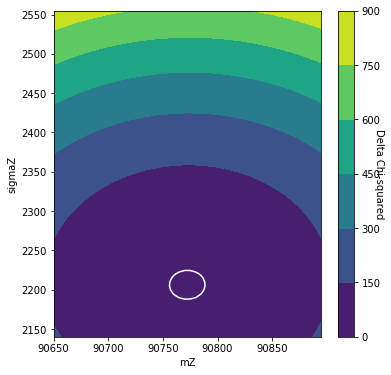

best-fit = 90770 +/- 8.92661813122686


In [82]:
#How about fitting the mass and the width at the same time?
#minMz = 90620
#maxMz = 90730

minSigmaZ = 2140
maxSigmaZ = 2560
step = 5

mZAr = np.arange(minMz, maxMz, step)
sigmaZAr = np.arange(minSigmaZ, maxSigmaZ, step)
chi2Ar = np.empty( (len(sigmaZAr), len(mZAr) ))

X, Y = np.meshgrid(mZAr, sigmaZAr)


bestFitMz2D = 0.0
minChi2 = 1000000

for yi in range(0, len(sigmaZAr)):
    for xi in range(0, len(mZAr)):
        #print( str(X[xi,yi]) + "," + str(Y[xi,yi]) )
        #print(chi2AtPoint(X[xi,yi],Y[xi,yi]))
        countsPDF = (cauchy.pdf(centres, X[yi, xi],Y[yi, xi]) * integral)
        chi2, ndf = calcChiSq(countsData, countsPDF)
        chi2Ar[yi, xi] = chi2
        if(chi2 < minChi2):
            #print("chi2 = " + str(chi2) + " mz = " + str(X[yi, xi]))
            minChi2 = chi2
            bestFitMz2D = X[yi, xi]

print(bestFitMz2D)
minChi2 = np.min(chi2Ar)
deltaChi2Ar = chi2Ar - minChi2

#plot 
levels = [2.3]
fig = plt.figure(figsize=(6,6))
ax = fig.gca()

cset = plt.contour(mZAr,sigmaZAr,deltaChi2Ar, levels=levels, colors=['white'])
cfset = plt.contourf(mZAr,sigmaZAr,deltaChi2Ar,  cmap='coolwarm')

h = plt.contourf(mZAr,sigmaZAr,deltaChi2Ar)

cbar = plt.colorbar(h)
cbar.set_label('Delta Chi-squared', rotation=270)
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('mZ')
ax.set_ylabel('sigmaZ')
plt.show()

#extract 2D result and uncertainty
my2DResult = bestFitMz2D
my2DUncertainty = bestFitMz2D-crit[1]
print("best-fit = " + str(my2DResult) + " +/- " + str(my2DUncertainty))

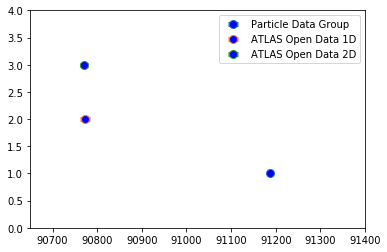

In [83]:
#compare to PDG world average
mZPDG =  91187.6
sigmaZPDG = 2.1

mZPDGAr = np.array([mZPDG]) 
sigZPDGAr = np.array([sigmaZPDG]) 
yPDGAr = np.array([1.0]) 

mZ1D = np.array([my1DResult]) 
sigZ1D = np.array([my1DUncertainty]) 
y1D = np.array([2.0]) 

mZ2D = np.array([my2DResult]) 
sigZ2D = np.array([my2DUncertainty]) 
y2D = np.array([3.0]) 

plt.figure()

ax = plt.gca()
ax.set_xlim(minMz, maxMz+500)#need to extend x axis range to include PDG value
ax.set_ylim(0.0, 4.0)

plt.errorbar(mZPDGAr, yPDGAr, xerr=sigZPDGAr, label="Particle Data Group", elinewidth=5,  fmt="o", mfc="blue", ms=8)
plt.errorbar(mZ1D, y1D, xerr=sigZ1D, fmt="o", label="ATLAS Open Data 1D", elinewidth=5, ms=8, mfc='blue')
plt.errorbar(mZ2D, y2D, xerr=sigZ2D, fmt="o", label="ATLAS Open Data 2D", elinewidth=5, ms=8, mfc='blue')

plt.legend()
plt.show()